****Importing Libraries****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Read CSV File**

In [5]:
df=pd.read_csv('Diwali Sales Data.csv',
               encoding='unicode_escape')

In [6]:
#Shape attribute is used to get shape of df
df.shape

(11251, 15)

In [7]:
#To display top 5 rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
#Get information about dtype,memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
#TO DROP NULL COLUMNS
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
#TO CHECK FOR NULL VALUES
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
df.shape

(11251, 13)

In [16]:
#TO DROP ALL NULL VALUES
df.dropna(inplace=True)

In [17]:
df.shape

(11239, 13)

In [18]:
#TO CHANGE DATATYPE
df['Amount'] = df['Amount'].astype('int')

In [20]:
#TO CHECK THE DATATYPE 
df['Amount'].dtypes

dtype('int32')

In [21]:
#describe() used to get descriptive statastics of data
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**Exploratory Data Analysis**

**Gender**

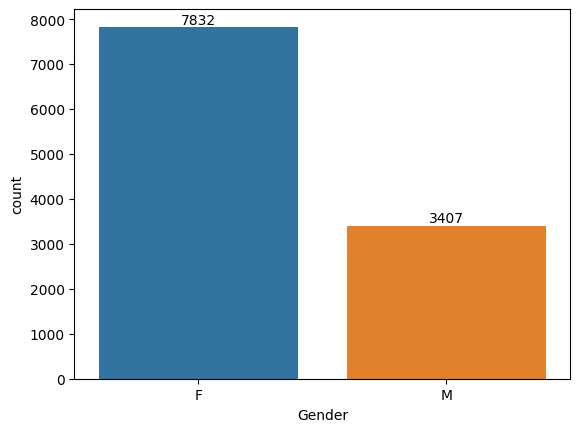

In [29]:
# plotting a bar chart for Gender and it's count
ax = sns.countplot(x='Gender', data=df , hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

In [38]:
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

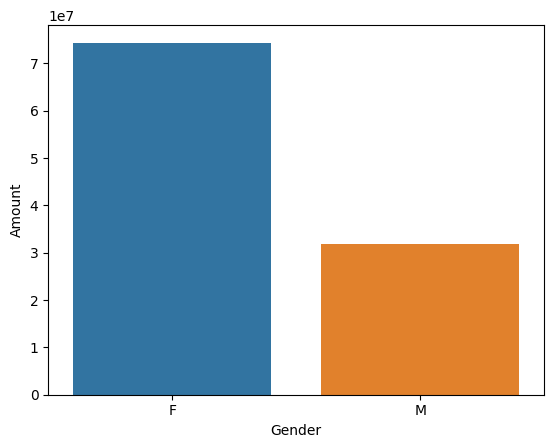

In [40]:
sns.barplot(x='Gender', y='Amount', data=sales_gen, hue='Gender')

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

**Age**

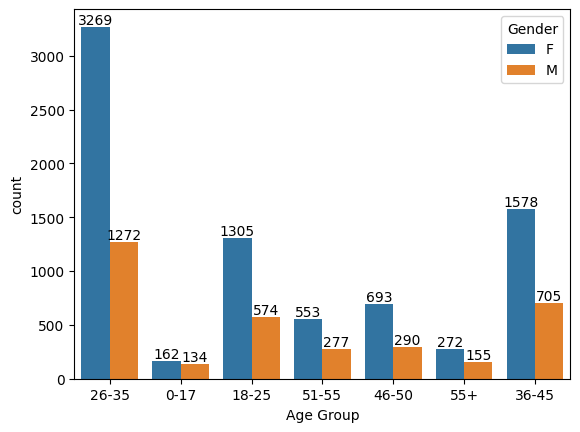

In [42]:
ax = sns.countplot(x='Age Group', hue='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [47]:
sales_age = df.groupby(['Age Group'] ,as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

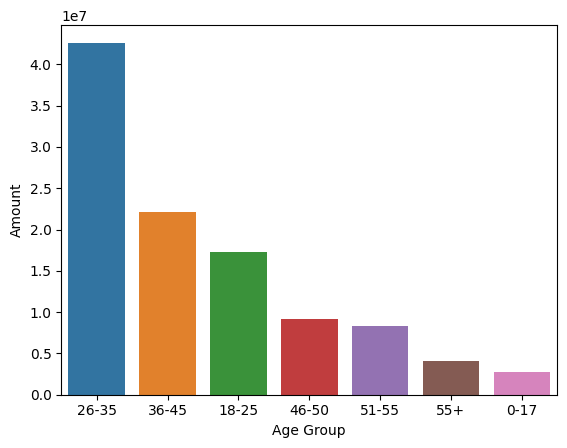

In [50]:
sns.barplot(x='Age Group', y='Amount', data=sales_age, hue='Age Group')

From above graph we can see that most of the buyers are of age group between 26-35 yrs female

**State**

In [55]:
df.groupby('State', as_index=False)['Orders'].sum()

,State,Orders
0,Andhra Pradesh,2051
1,Bihar,1062
2,Delhi,2740
3,Gujarat,1066
4,Haryana,1109
5,Himachal Pradesh,1568
6,Jharkhand,953
7,Karnataka,3240
8,Kerala,1137
9,Madhya Pradesh,2252


<Axes: xlabel='State', ylabel='Orders'>

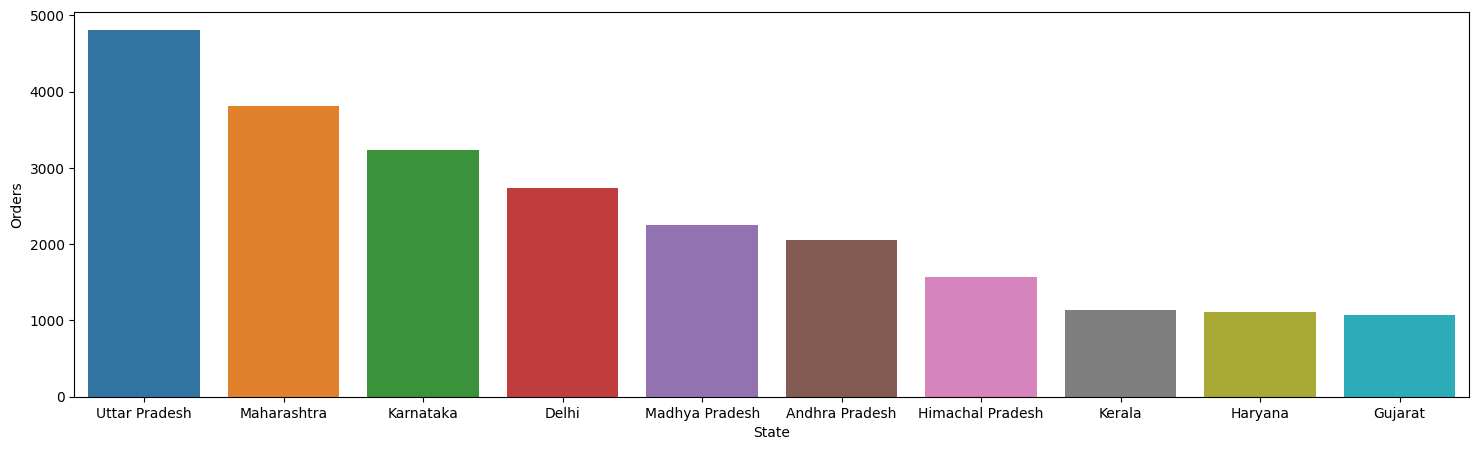

In [59]:
sales_state = df.groupby('State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(18,5))
sns.barplot(x='State', y='Orders', data=sales_state, hue='State')

<Axes: xlabel='State', ylabel='Amount'>

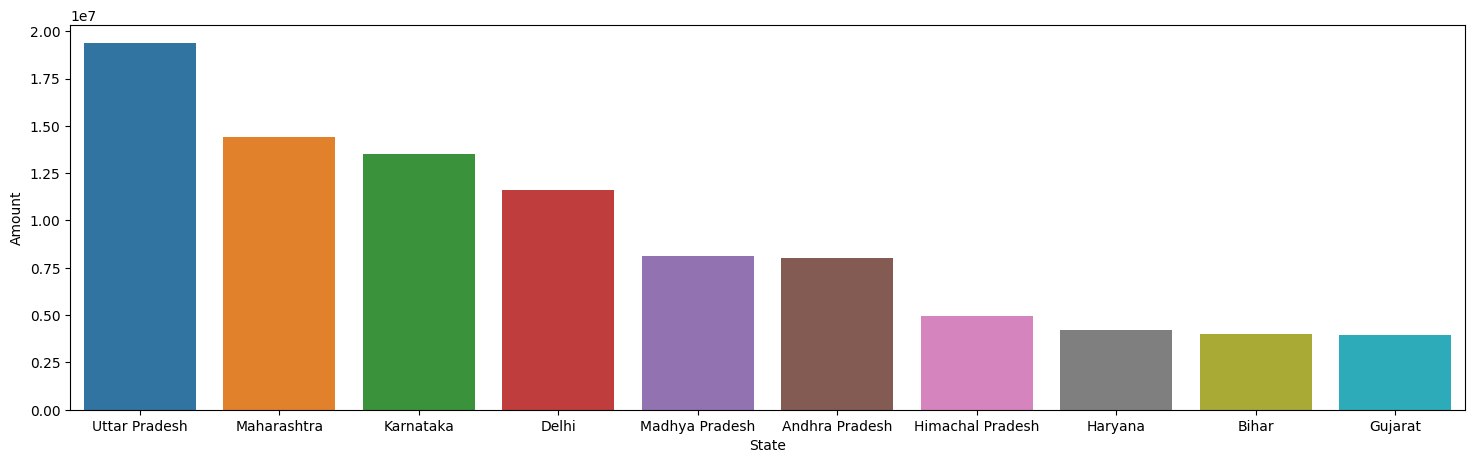

In [60]:
sales_state = df.groupby('State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(18,5))
sns.barplot(x='State', y='Amount', data=sales_state, hue='State')

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

**Marital Status**

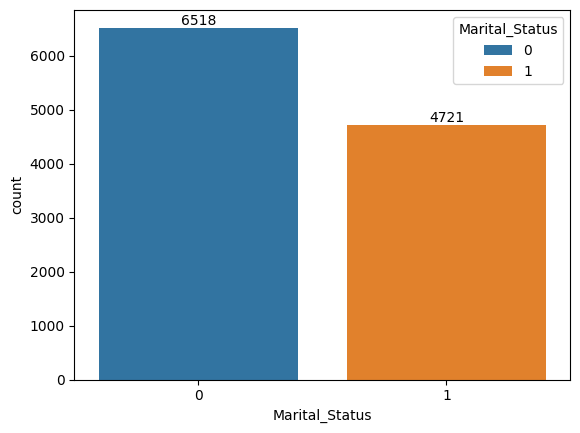

In [65]:
ax = sns.countplot(x='Marital_Status', data=df, hue='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

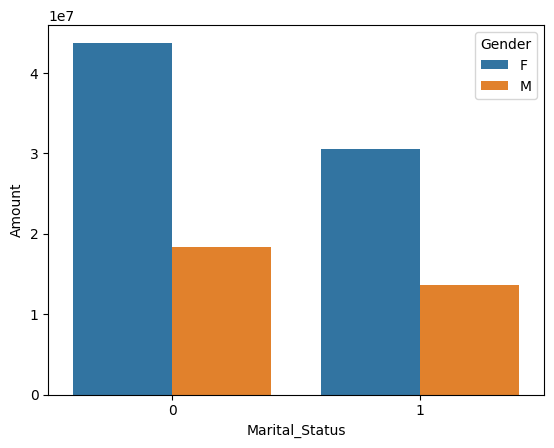

In [68]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=sales_state)

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

**Occupation**

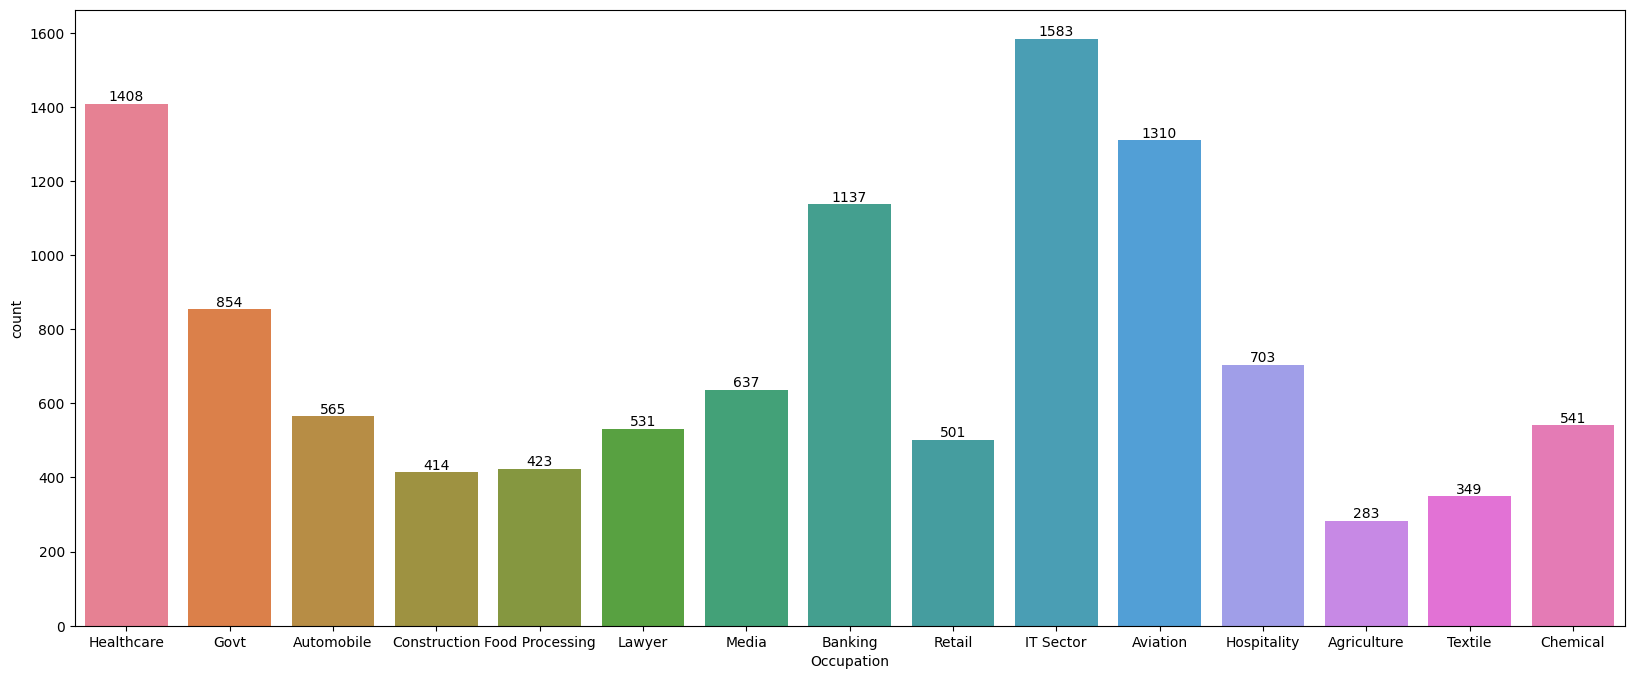

In [91]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Occupation', data=df, hue='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

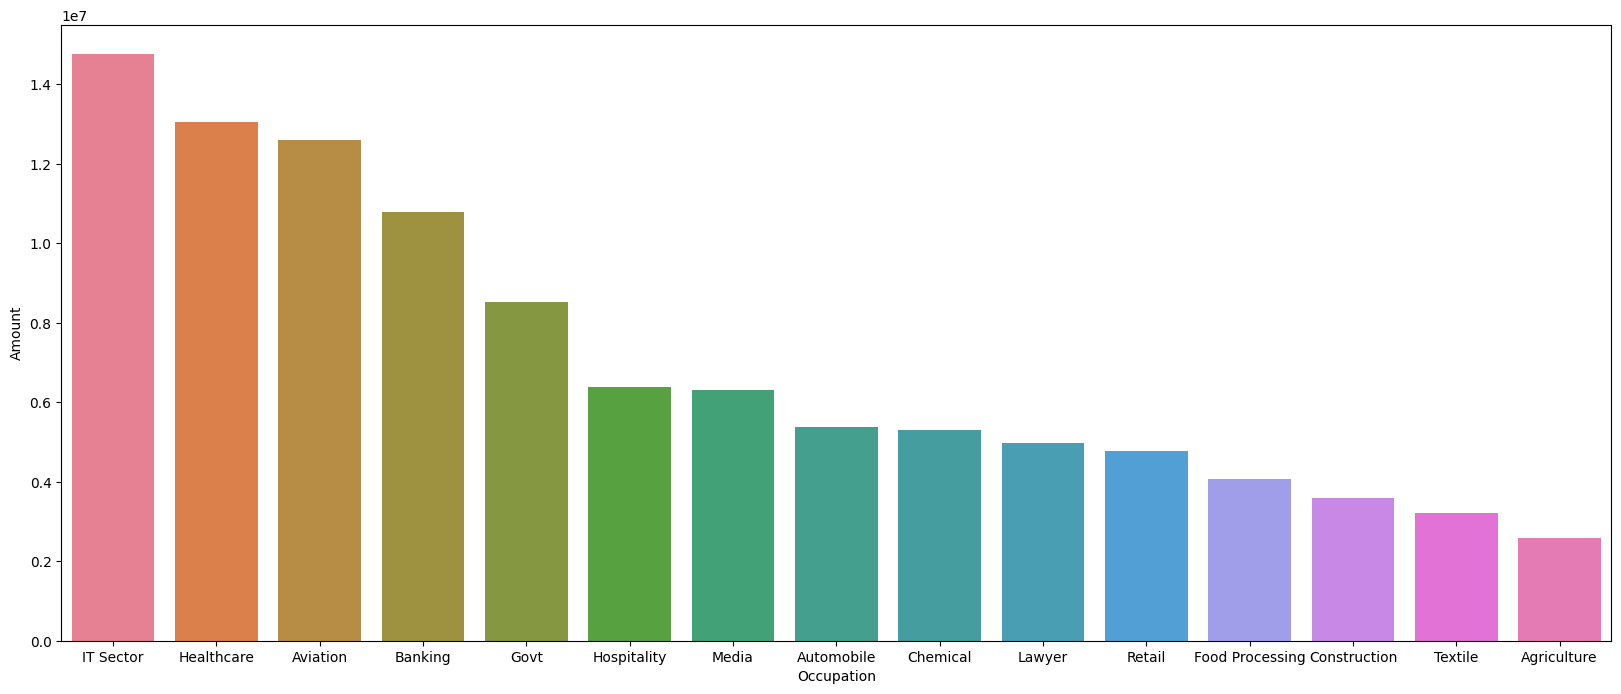

In [90]:
sales_occ = df.groupby('Occupation', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Occupation', y='Amount', data=sales_occ, hue='Occupation')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

**Product Category**

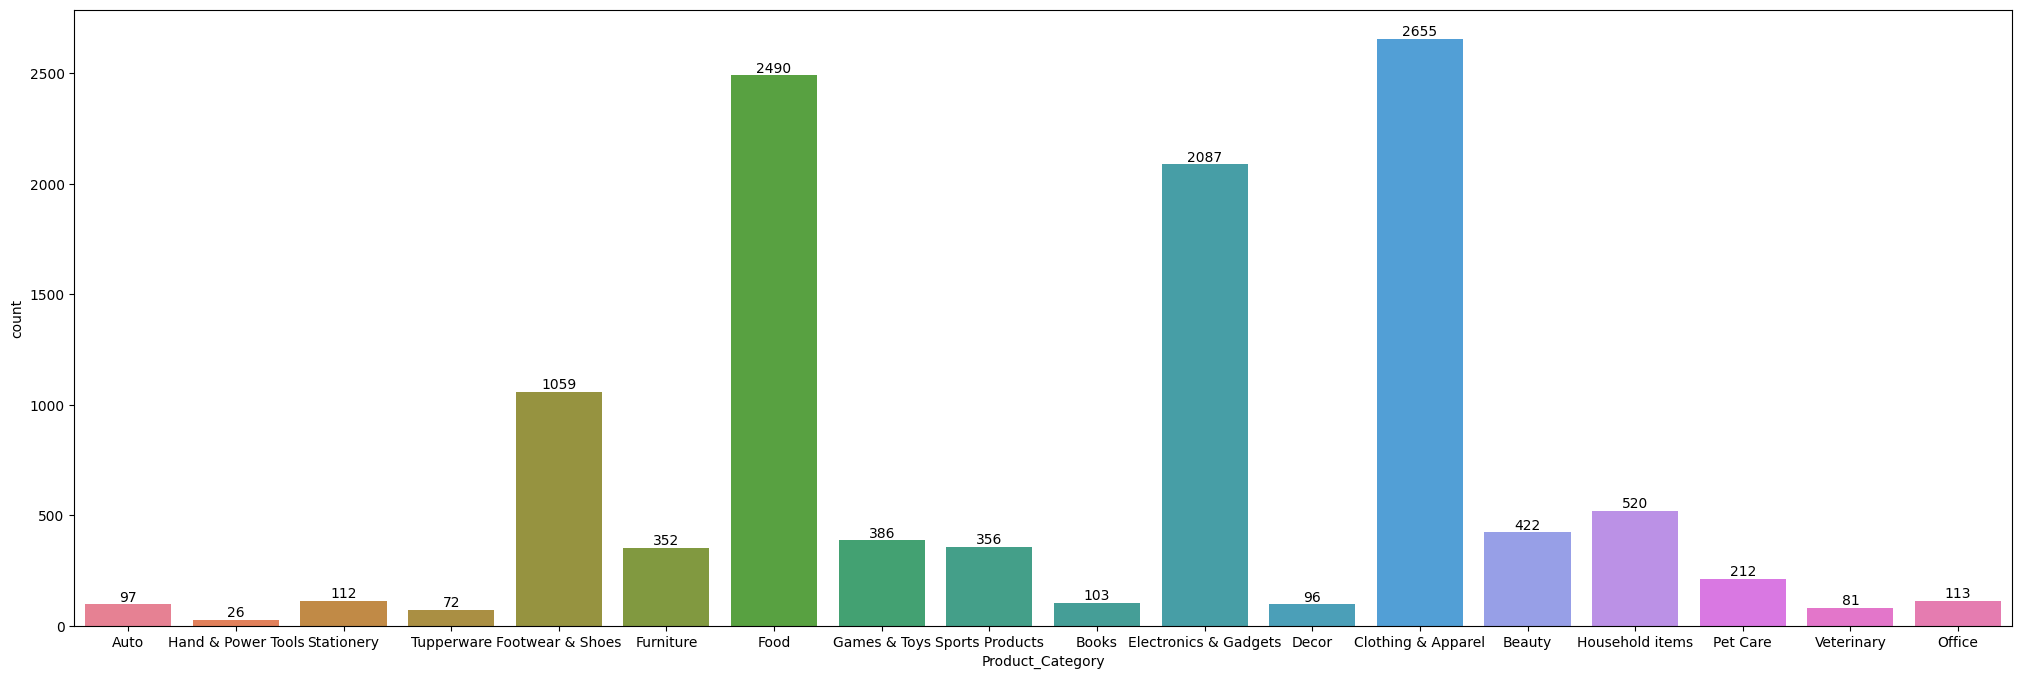

In [89]:
plt.figure(figsize=(25,8))
ax = sns.countplot(x='Product_Category', data=df, hue='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

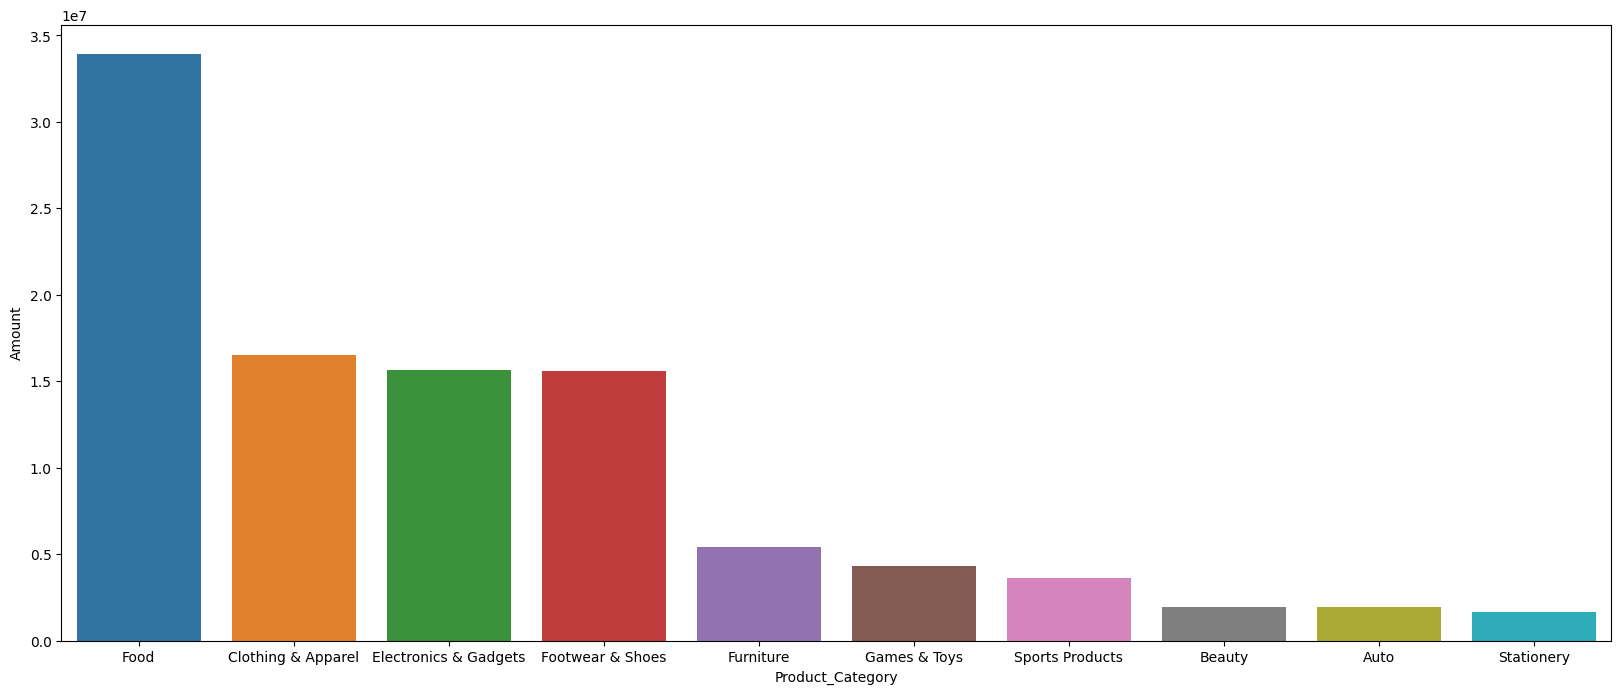

In [88]:
sales_prod = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(20,8))
sns.barplot(x='Product_Category', y='Amount', data=sales_prod, hue='Product_Category')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

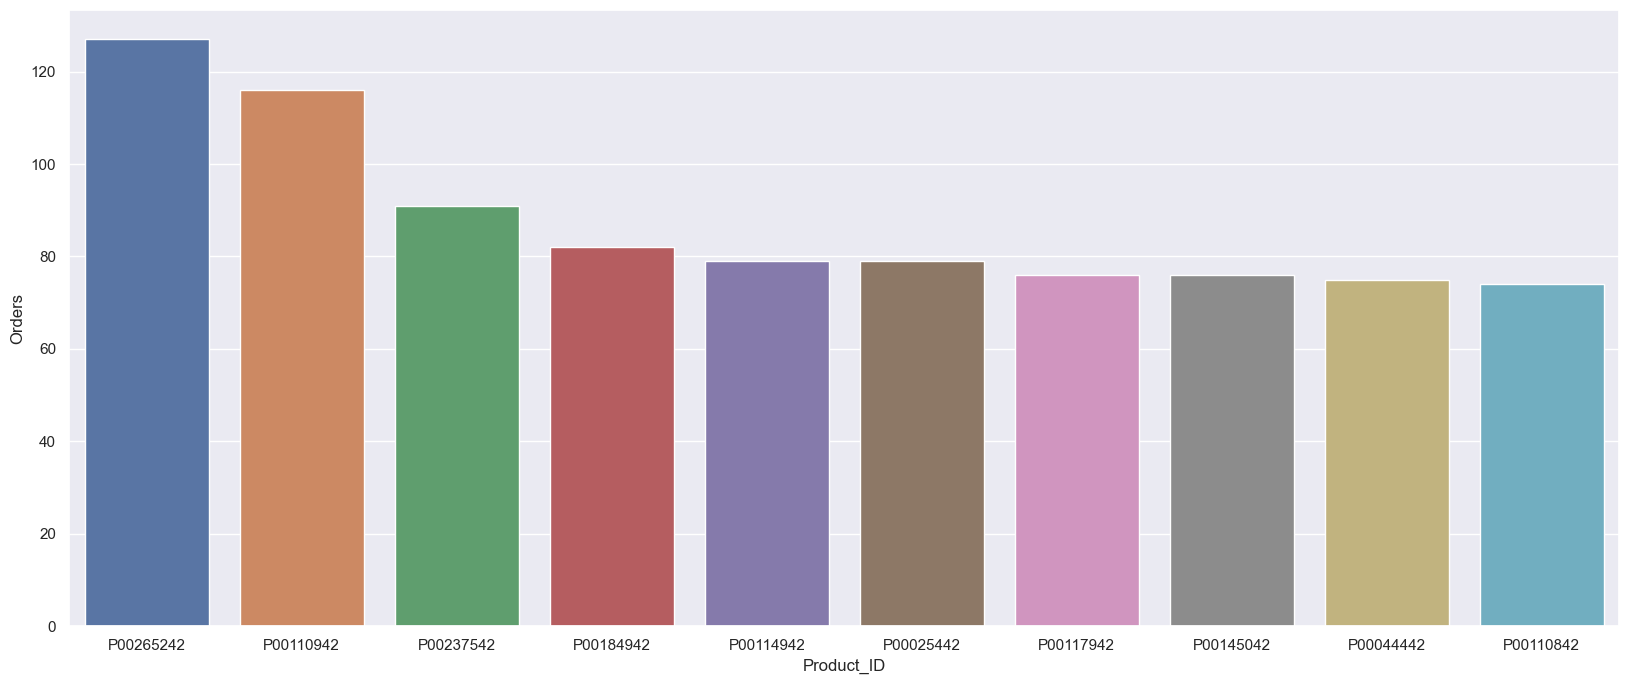

In [94]:
sales_prodID = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data=sales_prodID, x='Product_ID',y='Orders', hue='Product_ID')

**Conclusion:**

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.

*********Thank you*********                                   